# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<b>Можно сделать чуть проще)    
    
    def show_info(df_name):
        print(df_name.info)
        print('----------')
        display(df_name.head(10))
</div>

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [21]:
def show_info(df): #  создадим функцию выводящую информацию о датафрейме
    print(df.info())
    print('В датасете обнаружено:', df.duplicated().sum(), 'дубликатов')
    display(df.head(10))

In [20]:
show_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.columns #проверили названия столбцов 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.describe().T #ищем аномалии на первом этапе

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


***ВЫВОД:*** Можно сделать первый вывод, разница медианы и среднего значения max/min значения, стандартное отклонение по некоторым столбцам сильно разнится, что уже говорит про аномальные данные, например столбец last_price/total_area, по остальным столбцам необходимо убирать пропуски, чтобы анализировать дальше.

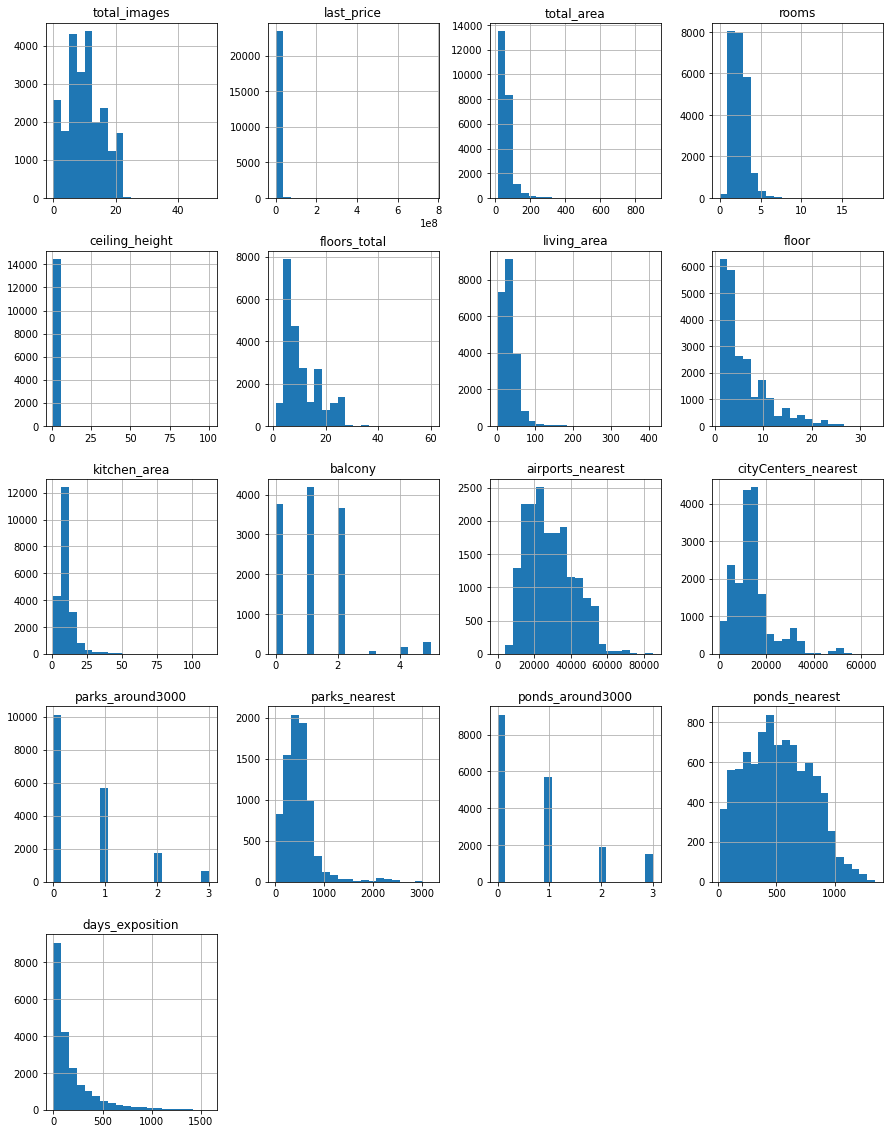

In [7]:
data.hist(figsize=(15,20),bins = 20);

***ВЫВОД*** Исходя из информации, представленной выше на графиках, можно сделать предположение, что большинство квартир с фотографиями (в среднем у большинства объявлений по 10 фотографий), больше всего квартир 2-4 комнатные, большинство объявлений с квартирами на 1-2-3 этаже, жилая площадь в среднем до 50 м2, и т д. По указанным гистограммам вывод сделать затруднительно. Для формулировки окончательных выводов нужно более детально изучить данные.

### Предобработка данных

In [9]:
data.isna().sum() #для просмотра количества пропущенных значений по столбцам

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

***ВЫВОД***
пропуски есть во многих столбцах:

  - ceiling_height 9195 #отсутствие данных подозрительно, высота потолка обязательная характеристика помещения, восстанавливать данные по медианному значению - единственный способ, среднее арифметическое значение не подойдет, так как есть выбросы (100 м2,30 м2 и т д).
     
  - floors_total  86 #данных небольшое количество 0,3% - можно удалить строки с пропущенными данными по столбцу
 
  - living_area  1903 #отсутствие данных подозрительно, жилая площадь обязательная характеристика помещения, если только некоторые квартиры не выведены в разряд нежилых, в случае анализа данные не будем учитывать, пропуски  не заполняем. 
 
  - is_apartment  20924 #вероятно в анкете при публикации объявления был выбор апартаменты/не апартаменты, этим и объясняется большое количество пропусков, большинство квартир не апартамент, другая зависимость отсутствует, заменим пропуски на False
 
  - kitchen_area  2278 #возможно не во всех квартирах есть кухни, например не во всех апартаментах бывают кухни или в квартирах студиях, в открытых планировках выделение зоны кухонь -  заменим пропуски на 0
 
  - balcony  11519 #возможно не во всех квартирах есть балконы, заменим пропуски на 0
 
  - locality_name 49 #количество пропусков небольшое 0,2% можно удалить, скорее всего кто-то не указал населенный пункт либо квартира расположена в Санкт-Петербурге, удалим
 
  - airports_nearest 5542 #заполнение анкеты при выставлении объявления предусматривало выбор ответа да/нет по наличию/отсутствию аэропорта вблизи дома, этим обусловлено большое количество пропусков
 
  - cityCenters_nearest 5519 #нужно изучать информацию о пропусках в этом столбце более детально, возможно критерий расположения не соответствовал описанию квартиры (не рядом с центром)
 
  - parks_around3000  5518 #нужно изучать информацию о пропусках в этом столбце более детально, возможно критерий расположения не соответствовал описанию квартиры (на расстоянии 3000 м отсутствуют парки)
 
  - parks_nearest  15620 #заполнение анкеты при выставлении объявления предусматривало выбор ответа да/нет по наличию/отсутствию парков вблизи дома, этим обусловлено большое количество пропусков (вблизи отсутствуют парки)
 
  - ponds_around3000  5518 #нужно изучать информацию о пропусках в этом столбце более детально, возможно критерий расположения не соответствовал описанию квартиры (на расстоянии 3000 м отсутствуют водоемы)
 
  - ponds_nearest  14589 #заполнение анкеты при выставлении объявления предусматривало выбор ответа да/нет по наличию/отсутствию водоемов вблизи дома, этим обусловлено большое количество пропусков (вблизи отсутствуют водоемы)
 
  - days_exposition  3181  #возможно некоторые объявления еще не сняты с публикации и по этой причине в таблице существуют пропуски, не использовать при анализе
 
Необходимо более детально изучить причину взникновения пропусков, вероятно, в большинстве случаев пропуски сделаны намерено. Ниже возможные замены пропусков.

In [10]:
data['ceiling_height'].unique() #уникальные значения столбца ceiling_height

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

***ВЫВОД*** восстанавливать данные по медианному значению - единственный способ, среднее арифметическое значение не подойдет, так как есть выбросы (100 м2,30 м2 и т д), выбросы (их небольшая часть) можно удалить или заменить на медианное значение.

In [11]:
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'])# перевели столбец в дробный формат для того чтобы применить метод describe

In [12]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [13]:
rows = (data['ceiling_height']>=5.0)|(data['ceiling_height'] <=1.5)
data.loc[rows,'ceiling_height'] = data['ceiling_height'].median() #заменили выбросы на медианное значение

data['ceiling_height'].unique() #провериили наличие выбросов

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 4.06, 2.94, 3.82,
       3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35,
       2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75,
       2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 ,
       3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97,
       3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63,
       3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23, 3.02,
       3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51,
       3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 1.

In [14]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #заполнили пропуски медианным значением, после 
data['ceiling_height'].isna().sum() #проверили пропуски

0

In [15]:
data = data.dropna(subset=['floors_total']) #удалили все строки с пропущенными значениями по этажности здания
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False) #заменили значения на False
data['is_apartment'].unique()#проверили

array([False,  True])

In [17]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)#допустим, что кухни отсутсвуют в этих квартирах (предположим апартаменты без кухонь,студии, квартиры с открытой панировкой)

In [18]:
data['balcony'] = data['balcony'].fillna(0) 
data['balcony'].isna().sum() #заполнение пропусков в столбце балкон и проверка (пропуски в столбце - балкон отсутствуют)

0

In [19]:
data = data.dropna(subset=['locality_name']) #удалили все строки с пропущенными значениями 

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
column_type_new = data[['balcony','floors_total','is_apartment']] #заменим типы данных
for column in column_type_new:
    data['balcony'] = data['balcony'].astype('int64')
    data['floors_total'] = data['floors_total'].astype('int64')
    data['is_apartment'] = data['is_apartment'].astype('bool')

In [24]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

***ВЫВОД:***
В столбцах выше изменили формат, для этажности здания и количества балконов подойдет целочисленный тип int, для апартаментов выбор да/нет (true/false), первый день публикации объявления перевели в формат даты. 

In [25]:
len(data['locality_name'].unique()) #найдем уникальные значения столбца месторасположение (количество)

364

In [26]:
sorted(data['locality_name'].unique()) #изучим уникальные значения

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [27]:
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок') #Заменим посёлок на поселок
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа') #Заменим гороской поселок на поселок городского типа
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино')#Заменим поселок Мурино на Мурино
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок станции') #Заменим поселок при железнодорожной станции на поселок станции
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово') #Заменим деревня Кудрово на Кудрово
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа Рябово','поселок Рябово')#Заменим поселок городского типа Рябово на поселок Рябово

In [28]:
sorted(data['locality_name'].unique()) #проверили уникальные значения

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

In [29]:
len(data['locality_name'].unique())

318

***ВЫВОД:*** Были найдены и скорректированы 46 неявных дубликатов.

***ВЫБРОСЫ И РЕДКИЕ ЗНАЧЕНИЯ***

In [30]:
data.describe().T #проанализируем выбивающиеся значения

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.00,6.0,9.00,14.00,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.00,3400000.0,4646000.00,6790000.00,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.00,40.0,52.00,69.70,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.00,1.0,2.00,3.00,19.0
ceiling_height,23565.0,2.695918e+00,2.153390e-01,1.75,2.6,2.65,2.70,4.9
floors_total,23565.0,1.067588e+01,6.594823e+00,1.00,5.0,9.00,16.00,60.0
living_area,21700.0,3.445482e+01,2.204536e+01,2.00,18.6,30.00,42.30,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.00,2.0,4.00,8.00,33.0
kitchen_area,23565.0,9.565173e+00,6.407798e+00,0.00,6.3,9.00,11.41,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.00,0.0,0.00,1.00,5.0


***ВЫВОД:*** есть выбивающиеся значения, например жилая площаль 2 м2(странная величина) либо общая площадь в 900 м2/жилая 409.7 м2 - может быть выбросом, дни размещения объявления 1 день - может быть выбросом, проверим гипотезы с помощью построения "ящика с усами"

(0.0, 700.0)

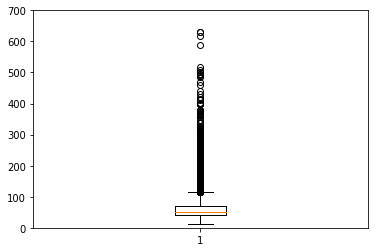

In [31]:
plt.boxplot(x=data['total_area']) #построили ящик с усами, чтобы определить выбросы по общей площади помещений
plt.ylim(0,700)

In [32]:
len(data.query('total_area>=125')) #посчитаем количество значений более 125 м2

958

 ***Вывод:*** помещений площадью более 125 м2  большое количество 958 строки (4%),вряд ли они являются выбросами, но квартиры с общей более 500М2 являются редкими и могут влияеть на результат - удаляем.

In [33]:
data = data.loc[data['total_area']<500] #удалили редкие значения, квартиры с общей площадью больше 500 м2

(0.0, 30.0)

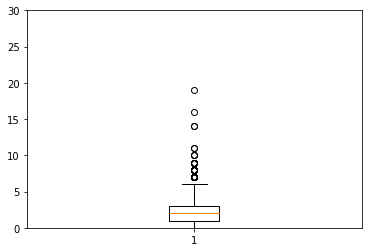

In [34]:
plt.boxplot(x=data['rooms']) #по количеству комнат 
plt.ylim(0,30)

In [35]:
data = data.loc[data['rooms']<15]  #является редким значением, удалим

In [36]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10,  9])

In [37]:
len(data.query('rooms==0 and open_plan==True'))

59

In [38]:
len(data.query('rooms==0 and studio==True'))

135

***Вывод***: Есть редкие значения, например количество комнат более 15 - удалим. Также в квартирах студия количество комнат указано нулевым значением 135 квартир и 59 квартир  открытой планировки с количеством компант 0 (необходимо при аналитике учитывать этот фактор)

(0.0, 60.0)

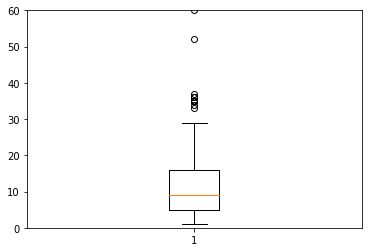

In [39]:
plt.boxplot(x=data['floors_total']) #этажность здания
plt.ylim(0,60)

In [40]:
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

In [41]:
data = data.loc[data['floors_total']<40] #значение этажность 52 и 60 является редким, удалим

(0.0, 30.0)

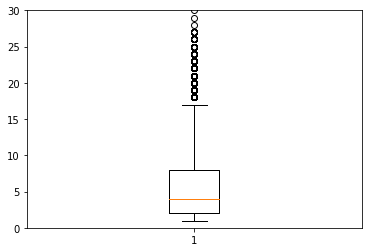

In [42]:
plt.boxplot(x=data['floor']) #этаж расположения квартиры
plt.ylim(0,30)

In [43]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [44]:
data = data.loc[data['floor']<34] #этаж более 34 является редкостью, удалим

(0.0, 50000000.0)

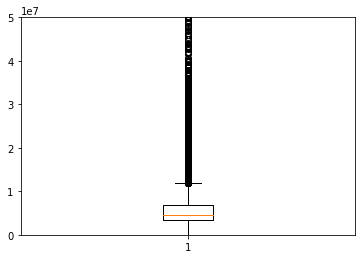

In [45]:
plt.boxplot(x=data['last_price']) 
plt.ylim(0,50000000)

In [46]:
sorted(data['last_price'].unique()) #изучаем стоимость

[12190.0,
 430000.0,
 440000.0,
 450000.0,
 470000.0,
 480000.0,
 490000.0,
 500000.0,
 520000.0,
 530000.0,
 550000.0,
 560000.0,
 565000.0,
 580000.0,
 585000.0,
 590000.0,
 600000.0,
 620000.0,
 630000.0,
 650000.0,
 660000.0,
 680000.0,
 690000.0,
 700000.0,
 710000.0,
 720000.0,
 730000.0,
 740000.0,
 750000.0,
 760000.0,
 770000.0,
 777000.0,
 780000.0,
 790000.0,
 799000.0,
 800000.0,
 820000.0,
 850000.0,
 860000.0,
 869000.0,
 870000.0,
 880000.0,
 890000.0,
 900000.0,
 910000.0,
 920000.0,
 945750.0,
 950000.0,
 965780.0,
 970000.0,
 980000.0,
 990000.0,
 995000.0,
 999000.0,
 999999.0,
 1000000.0,
 1010000.0,
 1020000.0,
 1030000.0,
 1050000.0,
 1060000.0,
 1070000.0,
 1080000.0,
 1090000.0,
 1099000.0,
 1100000.0,
 1110000.0,
 1130000.0,
 1150000.0,
 1170000.0,
 1180000.0,
 1190000.0,
 1199000.0,
 1200000.0,
 1220000.0,
 1230000.0,
 1240000.0,
 1249000.0,
 1250000.0,
 1260000.0,
 1270000.0,
 1280000.0,
 1290000.0,
 1300000.0,
 1310000.0,
 1315000.0,
 1320000.0,
 1330000.0,


In [47]:
data = data.loc[data['last_price']>13000] #является выбросом,удалим его

In [48]:
data = data.loc[data['days_exposition']>3] #дни продажи, является выбросом или редким значением (их не много),удалим его, таких значений не много, но они могут искажать статистику


In [49]:
data.describe().T #проверяем выбивающиеся значения

,count,mean,std,min,25%,50%,75%,max
total_images,20379.0,9.630502e+00,5.657625e+00,0.00,6.0,9.00,14.000,50.0
last_price,20379.0,6.202602e+06,1.010019e+07,430000.00,3400000.0,4500000.00,6500000.000,763000000.0
total_area,20379.0,5.865060e+01,3.257538e+01,12.00,39.5,50.79,67.785,495.0
rooms,20379.0,2.021149e+00,1.036622e+00,0.00,1.0,2.00,3.000,14.0
ceiling_height,20379.0,2.689892e+00,2.048281e-01,1.75,2.6,2.65,2.700,4.9
floors_total,20379.0,1.086005e+01,6.634503e+00,1.00,5.0,9.00,16.000,37.0
living_area,18712.0,3.344442e+01,2.072571e+01,2.00,18.3,30.00,41.500,347.5
floor,20379.0,5.972275e+00,4.928726e+00,1.00,2.0,4.00,8.000,33.0
kitchen_area,20379.0,9.374727e+00,6.121073e+00,0.00,6.3,8.90,11.200,107.0
balcony,20379.0,5.947299e-01,9.506385e-01,0.00,0.0,0.00,1.000,5.0


***ВЫВОД:*** Данные в таблице выше стали более приемлемыми для дальнейшей аналитики, очищены от выбросов и редких значений (этаж, этажность, количетсво комнат, общая площадь). Возникла гипотеза о зависимости стоимости от локации, нужно разделить на группы по месторасположению.

In [22]:
data = data.loc[data['last_price']<150000000] #является выбросом,удалим его

### Добавим в таблицу новые столбцы для дальнейшей аналитики

In [51]:
data['price_per_m'] = (data['last_price']/data['total_area']).round(2) #столбец стоимость за м2
pd.set_option('display.max_columns', None)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.6,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129903.98
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,False,False,6.0,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,45000.00
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.0,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73717.95
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.5,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.37


In [52]:
data['week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data ['year'] = data['first_day_exposition'].dt.year
#добавлено три новых столбца (день,месяц,год)

In [53]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

data.head(20) #разбили данные на категории и вывели первые 20 строк на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,week,month,year,floor_type
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой
11,9,3300000.0,44.00,2018-08-27,2,2.65,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000.00,0,8,2018,другой


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20368 entries, 1 to 23697
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20368 non-null  int64         
 1   last_price            20368 non-null  float64       
 2   total_area            20368 non-null  float64       
 3   first_day_exposition  20368 non-null  datetime64[ns]
 4   rooms                 20368 non-null  int64         
 5   ceiling_height        20368 non-null  float64       
 6   floors_total          20368 non-null  int64         
 7   living_area           18701 non-null  float64       
 8   floor                 20368 non-null  int64         
 9   is_apartment          20368 non-null  bool          
 10  studio                20368 non-null  bool          
 11  open_plan             20368 non-null  bool          
 12  kitchen_area          20368 non-null  float64       
 13  balcony         

In [55]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median()) 
data['cityCenters_nearest'].isna().sum() #заменили пропуски в столбце расположение относительно центра города
#на медианное значение этого столбца и проверили наличие пропусков по столбцу

0

In [56]:
data['dist_to_cent_km'] = (data['cityCenters_nearest']/1000).round(0) #расстояние от центра города в километрах
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,week,month,year,floor_type,dist_to_cent_km
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок городского типа Янино-1,NaN,13168.0,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.6,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129903.98,3,10,2016,другой,4.0
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,False,False,6.0,0,Тихвин,NaN,13168.0,NaN,NaN,NaN,NaN,413.0,45000.00,4,7,2017,другой,13.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.0,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73717.95,4,8,2016,другой,34.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.5,0,Тосно,NaN,13168.0,NaN,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,13.0


### Проведем исследовательский анализ данных

***ВЫВОД:*** Для проведения более детального анализа данных было приянто решение разделить на две категории по местоположению от центра города, т к есть предположение, что стоимость больше всего зависит от месторасположения, далее будем сравнивать уже зависимость факторов от цены в разных локациях, что сделает аналитику более реалистичной. 
Ранее заполнили пропуски в данных по столбцу расположение от центра города медианным значением, так как диапазон широкий и заполнение средним арифметическим не подходящий вариант.

In [57]:
data_near_20km = data.query('dist_to_cent_km<20')
data_near_20km #объявления 20 км от центра 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,week,month,year,floor_type,dist_to_cent_km
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок городского типа Янино-1,NaN,13168.0,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,False,False,6.0,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105769.23,3,7,2018,другой,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.6,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129903.98,3,10,2016,другой,4.0
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,False,False,6.0,0,Тихвин,NaN,13168.0,NaN,NaN,NaN,NaN,413.0,45000.00,4,7,2017,другой,13.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.5,0,Тосно,NaN,13168.0,NaN,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,13.0


In [58]:
data_near_20km.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 1 to 23697
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18014 non-null  int64         
 1   last_price            18014 non-null  float64       
 2   total_area            18014 non-null  float64       
 3   first_day_exposition  18014 non-null  datetime64[ns]
 4   rooms                 18014 non-null  int64         
 5   ceiling_height        18014 non-null  float64       
 6   floors_total          18014 non-null  int64         
 7   living_area           16511 non-null  float64       
 8   floor                 18014 non-null  int64         
 9   is_apartment          18014 non-null  bool          
 10  studio                18014 non-null  bool          
 11  open_plan             18014 non-null  bool          
 12  kitchen_area          18014 non-null  float64       
 13  balcony         

In [59]:
data_far_20km = data.query('dist_to_cent_km>=20') #объявления дальше 20 км от центра
data_far_20km

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,week,month,year,floor_type,dist_to_cent_km
11,9,3300000.0,44.0,2018-08-27,2,2.65,5,31.0,4,False,False,False,6.0,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000.00,0,8,2018,другой,52.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,False,False,False,5.2,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943.93,5,7,2017,последний,33.0
14,1,4400000.0,36.0,2016-06-23,1,2.65,6,17.0,1,False,False,False,8.0,0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,122222.22,3,6,2016,первый,31.0
28,8,4170000.0,44.0,2017-12-13,1,2.90,6,20.8,1,False,False,False,11.7,1,Пушкин,18557.0,30710.0,0.0,NaN,1.0,118.0,74.0,94772.73,2,12,2017,первый,31.0
33,8,4800000.0,73.0,2018-10-15,4,2.65,9,51.6,5,False,False,False,6.5,0,Колпино,26535.0,32321.0,0.0,NaN,0.0,NaN,92.0,65753.42,0,10,2018,другой,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23660,1,2950000.0,53.6,2018-02-01,2,2.75,3,32.0,3,False,False,False,5.8,1,Красное Село,38293.0,41718.0,0.0,NaN,0.0,NaN,35.0,55037.31,3,2,2018,последний,42.0
23667,14,9990000.0,90.0,2017-01-23,3,3.06,17,55.0,9,False,False,False,11.0,2,Сестрорецк,56343.0,33272.0,0.0,NaN,1.0,545.0,86.0,111000.00,0,1,2017,другой,33.0
23669,8,3000000.0,34.1,2017-11-10,1,2.65,9,17.0,3,False,False,False,9.0,1,Колпино,24687.0,30473.0,0.0,NaN,1.0,741.0,74.0,87976.54,4,11,2017,другой,30.0
23678,10,3500000.0,43.0,2016-05-19,2,2.50,3,26.1,2,False,False,False,4.9,1,Пушкин,15823.0,27977.0,0.0,NaN,1.0,1134.0,252.0,81395.35,3,5,2016,другой,28.0


***ВЫВОД:*** Разделили все объявления на две группы по локации, в зависимости от удаленности от центра города, данное разделение может нам помочь более детально рассмотреть две группы.

In [60]:
len(data_far_20km.query('balcony==0')) # проверили гипотезу, что количесво балконов пропущено больше в групе расположеной от центра города дальше 20 км , 
#по причине их отсутсвия в деревнях и селах, и ПГТ из 2354 в 1493 нет балкона, что подтверждает факт корректности заполнения пропущенных данных на 0

1493

In [61]:
multi = data_near_20km.pivot_table(index = 'locality_name',values = ['living_area', 'total_area','kitchen_area' , 'floors_total','rooms','last_price'], aggfunc = 'mean')
multi
multi.corr() 

,floors_total,kitchen_area,last_price,living_area,rooms,total_area
floors_total,1.000000,0.145216,0.324557,-0.139790,-0.165082,-0.066818
kitchen_area,0.145216,1.000000,0.295227,0.097055,-0.015421,0.145567
last_price,0.324557,0.295227,1.000000,0.424706,0.232649,0.615304
living_area,-0.139790,0.097055,0.424706,1.000000,0.720906,0.814527
rooms,-0.165082,-0.015421,0.232649,0.720906,1.000000,0.737695
total_area,-0.066818,0.145567,0.615304,0.814527,0.737695,1.000000


***ВЫВОД:*** явных прямых зависимостей в группе до 20 км от центра от цены не наблюдается, кроме как общая площадь и цена квартиры, необходимо строить графики дальше для аналитики зависимостей.

In [62]:
multi2 = data_far_20km.pivot_table(index = 'locality_name',values = ['living_area', 'total_area','kitchen_area' , 'floors_total','rooms','last_price'], aggfunc = 'mean')
multi2
multi2.corr() 

,floors_total,kitchen_area,last_price,living_area,rooms,total_area
floors_total,1.000000,0.110239,-0.082628,0.110336,-0.386158,-0.023950
kitchen_area,0.110239,1.000000,0.438248,0.323057,0.315207,0.373909
last_price,-0.082628,0.438248,1.000000,0.813345,0.661352,0.891524
living_area,0.110336,0.323057,0.813345,1.000000,0.792891,0.942929
rooms,-0.386158,0.315207,0.661352,0.792891,1.000000,0.764252
total_area,-0.023950,0.373909,0.891524,0.942929,0.764252,1.000000


***ВЫВОД:*** в группе квартир, расположенных от центра более 20 км прослеживается сильная зависимость стоимости квартиры и общей площади/жилой площади квартиры, также существует небольшая зависимость от количества комнат и стоимости квартиры, но она не такая значительная. 

# ***РАССМОТРИМ БОЛЕЕ ДЕТАЛЬНО ГРУППУ 1 (расположение до 20 км от центра города)***

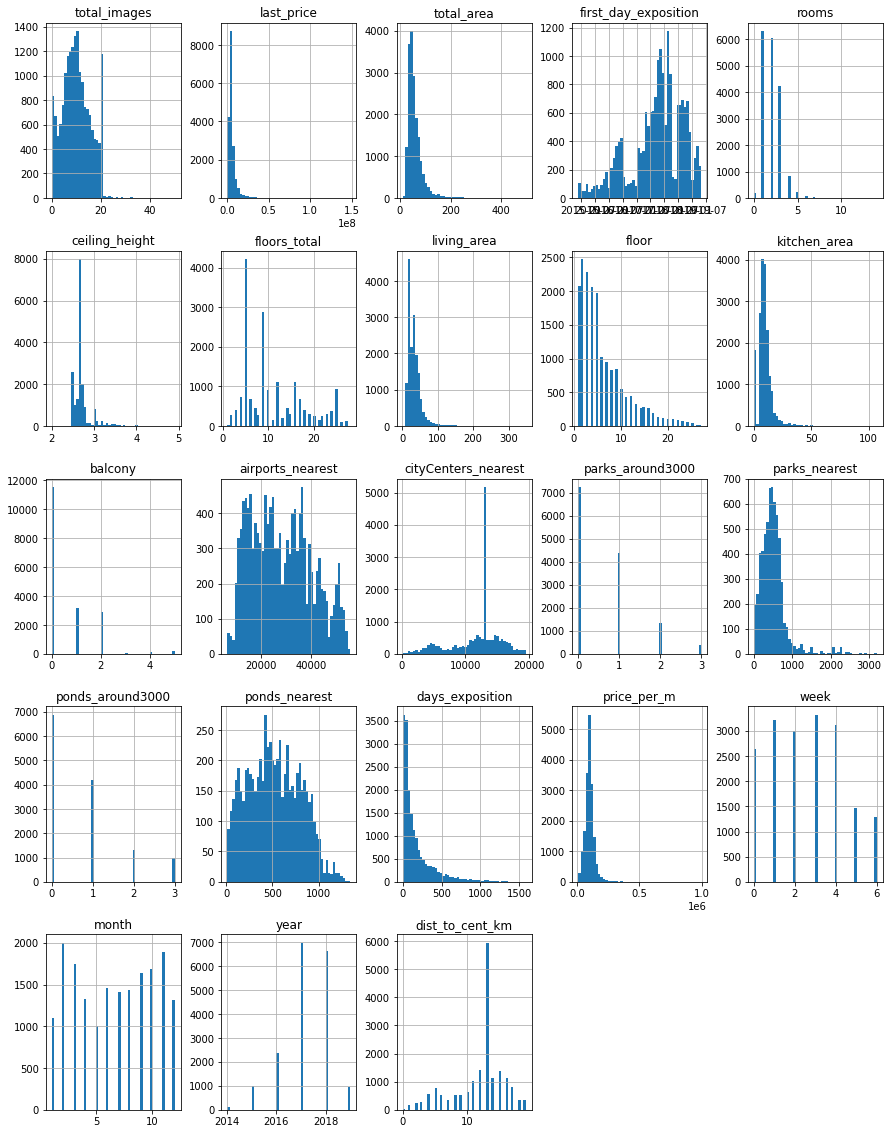

In [63]:
data_near_20km.hist(figsize=(15,20), bins=50); #построим гистограмму для группы квартир до 20 км от центра города

In [64]:
data_grouped_floors_total = data_near_20km.groupby('floor_type')['last_price'].agg(['count']) #группировка по категории этаж расположения квартиры
data_grouped_floors_total

,count
floor_type,
другой,13537
первый,2084
последний,2393


In [65]:
data_grouped_floors_total = data.groupby('floors_total')['last_price'].agg(['count']) #этажность зданий
data_grouped_floors_total.sort_values(by='count',ascending = False).head()

,count
floors_total,
5,4903
9,3296
12,1203
16,1197
10,1022


***ВЫВОД:***

 - общая площадь - наибольшее количество объявлений с общей площадью до 100 м2, есть объявления и с большей площадью, но в соотношении ко всему количеству объявлений их доля мала, часть объявлений с площадью более 500 м2 мы удалили из данных, по причине того, что данные редкие и могут являться выбросами;

 - жилая площадь - что касается жилой площади, то большая часть объявлений с жилой площадью до 50 м2, есть также помещения с жилой площадью очень малой от 2 -5 м2, но мы не удаляли такие помещения по причине того, что малые апартаменты либо студии могут иметь малые значения жилой площади. Также мы не удаляли пропущенные значения, при дальнейшей аналитике мы не будем их учитывать.

 - площадь кухни - в основном площадь кухни составляет около 10-15м2, но много было пропущенных значений, которые мы заменили намерено на 0, например в апартаментах, квартирах студиях или в квартира с открытой планировкой кухня может отсутствовать либо не виделяться в отдельную зону.

 - цена объекта -  из данных удалила 1 аномальное значение 12 тыс р и квартиры стоимостью более 150 000 000, что является выбросом, остальные помещения от 400 тыс до 600 тыс не удаляла, так во времена среза данных вполне вероятная стоимость апартаментов или квартир в отдаленных локациях (нужно дополнительно исследовать).

 - количество комнат - больше всего квартир с количеством комнат от 1-5, но были и аномальные (редкие квартиры с количеством комнат более 15, мы их удалили, также в квартирах студиях количество комнат указано нулевым значением 135 квартир и 59 квартир с количеством компант 0 открытой планировки, что влияет на график.

 - высота потолков - наибольшее количество квартир с высотой потолка от 2-3 м, аномальные показатели свыше 6 м были заполнены по медианном значению, также, как и пропуски по этому столбцу.

 - этаж квартиры - наибольшее количество квартир до 7 этажа, сильно редкие этажи свыше 33 были удалены из таблицы.

 - тип этажа квартиры («первый», «последний», «другой»)- больше всего объявлений с расположением на различных этажах, кроме первого и последнего.
 
 - общее количество этажей в доме - больше всего объявлений в домах этажностью 5 и 9 этажей, что вполне популярное строение в Санкт-Петербурге.
 
 - расстояние до центра города в метрах - наибольшее количество объявлений с квартирам от 10 до 20 км до центра города.
 
 - расстояние до ближайшего аэропорта - наибольшее количество квартир на растоянии до 25 км от аэропорта.
 
 - расстояние до ближайшего парка - в большинстве квартир парки расположены на растоянии до 1 км.
 
 - день и месяц публикации объявления - больше всего объявлений публикуется в будние дни в отличие от выходных, а также в зимние месяцы (кроме января и декабря - праздники), также в летнее время меньше публикаций, чем осенью.

Text(0.5, 1.0, 'День публикации')

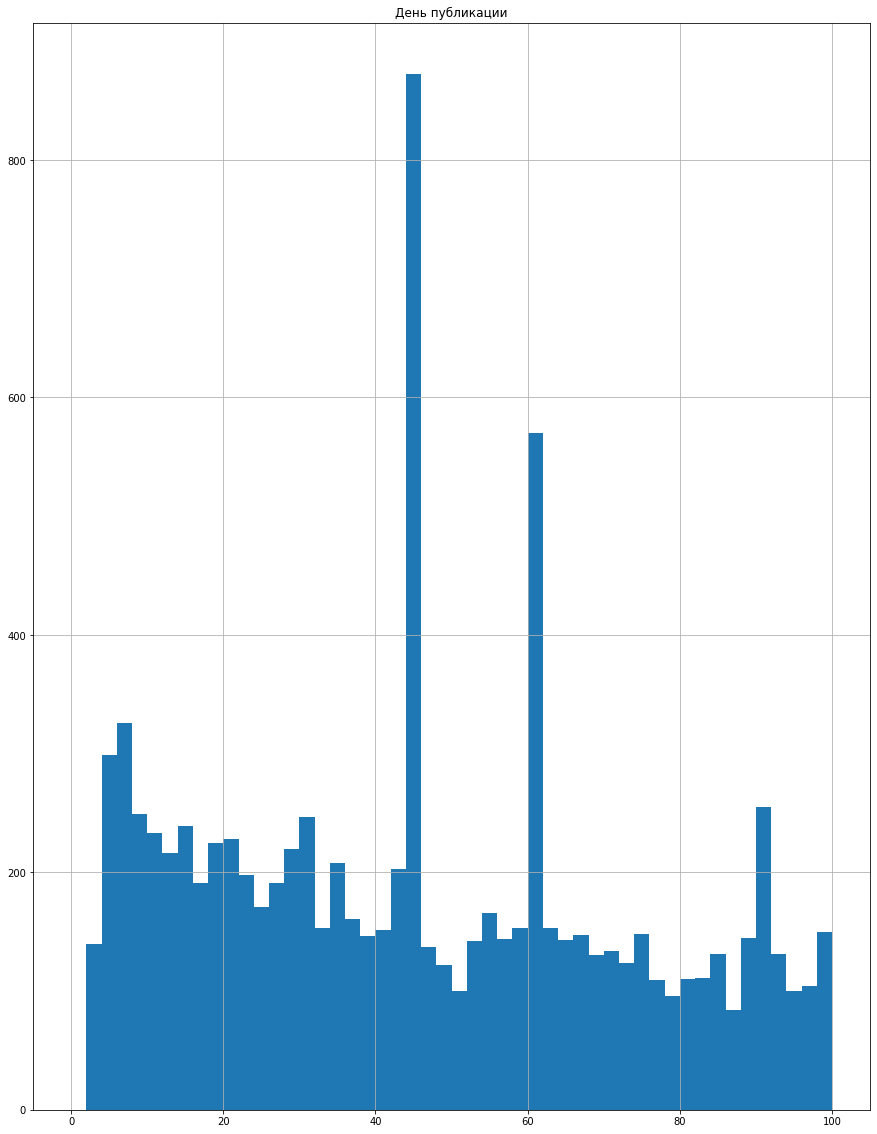

In [66]:
data_near_20km.hist('days_exposition', figsize=(15,20), bins=50,range = (0,100));
plt.title('День публикации')

In [67]:
data_near_20km['days_exposition'].describe().T

count    18014.000000
mean       181.085378
std        220.711936
min          3.000000
25%         44.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [68]:
data_near_20km.query('days_exposition <10').head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,week,month,year,floor_type,dist_to_cent_km
53,7,4300000.0,39.10,2017-11-10,1,2.65,25,15.4,13,False,False,False,15.5,2,поселок Парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,6.0,109974.42,4,11,2017,другой,19.0
62,0,4800000.0,78.60,2017-09-17,3,2.80,9,48.8,5,False,False,False,11.9,2,Сертолово,NaN,13168.0,NaN,NaN,NaN,NaN,5.0,61068.70,6,9,2017,другой,13.0
94,3,3500000.0,29.50,2019-04-26,1,2.50,5,15.6,2,False,False,False,5.5,1,Санкт-Петербург,12921.0,7303.0,0.0,NaN,0.0,NaN,4.0,118644.07,4,4,2019,другой,7.0
100,16,3800000.0,38.60,2018-02-22,1,2.65,9,18.0,6,False,False,False,8.4,2,Санкт-Петербург,36450.0,13364.0,0.0,NaN,0.0,NaN,8.0,98445.60,3,2,2018,другой,13.0
106,9,10500000.0,124.10,2017-05-25,5,3.20,4,79.4,3,False,False,False,20.0,0,Санкт-Петербург,26825.0,5527.0,1.0,384.0,0.0,NaN,6.0,84609.19,3,5,2017,другой,6.0
123,2,4300000.0,48.00,2019-04-04,1,2.65,22,14.0,5,False,False,False,23.8,0,Санкт-Петербург,16951.0,15747.0,0.0,NaN,1.0,1097.0,9.0,89583.33,3,4,2019,другой,16.0
156,11,10990000.0,80.00,2018-06-25,2,2.75,22,34.0,19,False,False,False,19.0,2,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,7.0,137375.00,0,6,2018,другой,15.0
180,11,3850000.0,31.70,2018-08-02,1,2.50,5,17.9,2,False,False,False,5.6,2,Санкт-Петербург,10709.0,10933.0,0.0,NaN,0.0,NaN,8.0,121451.10,3,8,2018,другой,11.0
246,20,4500000.0,52.50,2018-08-12,2,2.60,14,29.5,11,False,False,False,7.5,2,Санкт-Петербург,13787.0,11753.0,0.0,NaN,0.0,NaN,9.0,85714.29,6,8,2018,другой,12.0
294,20,3850000.0,37.00,2018-10-14,1,2.50,16,18.2,15,False,False,False,8.8,1,Санкт-Петербург,41359.0,11491.0,2.0,75.0,0.0,NaN,3.0,104054.05,6,10,2018,другой,11.0


***ВЫВОД:*** Больше всего случаев продажи квартир до 2 месяцев. Среднее время продажи 180 дней отличается от медианного 95 дней по причине того, что есть квартиры продающиеся очень долго, есть быстрые продажи (большой разброс). Необычно быстрые это продажи за 3-10 дней, необычно долгие продажи от 1000 дней (от 3 лет).

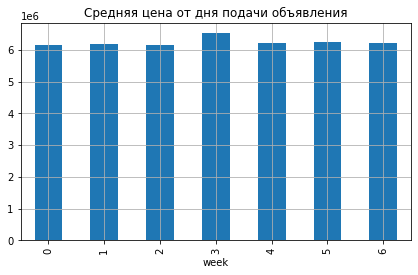

In [69]:
#Построить диаграмму день публикации

data_near_20km.groupby('week')['last_price'].mean().plot(kind='bar', figsize=(7,4), grid = True, title='Средняя цена от дня подачи объявления');


ВЫВОД: Цена не зависит от дня подачи объявления.

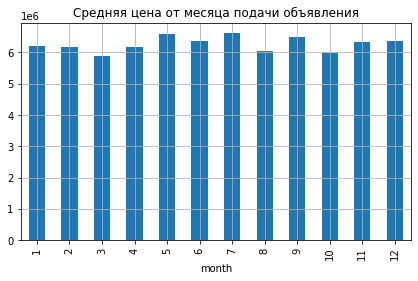

In [70]:
#Построить диаграмму  месяц публикации
data_near_20km.groupby('month')['last_price'].mean().plot(kind='bar', figsize=(7,4), grid = True, title='Средняя цена от месяца подачи объявления');

ВЫВОД: Стоимость квартир особо не зависит от месяца подачи объявления, примерно одинаковая.

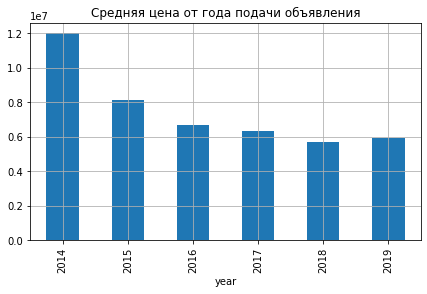

In [71]:
#Построить диаграмму год публикации
data_near_20km.groupby('year')['last_price'].mean().plot(kind='bar', figsize=(7,4), grid = True, title='Средняя цена от года подачи объявления');

ВЫВОД: Стоимость квартир снижалась, наибольшая стоимость была в 2014 году. В 2019 году наблюдается восхождение- возможный рост.

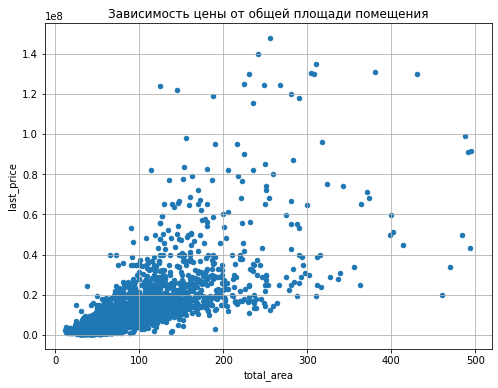

In [77]:
#зависимость двух параметров цена -  площадь общая
data_near_20km.plot(x='total_area', y='last_price', kind='scatter', figsize=(8, 6), grid=True);
plt.title('Зависимость цены от общей площади помещения')
plt.show()

ВЫВОД: Зависимость цена квартиры и общая площаль квартиры существует, чем больше общая площадь, тем больше стоимость квартиры.

In [78]:
data_near_20km['last_price'].corr(data_near_20km['living_area'])

0.6551677379169745

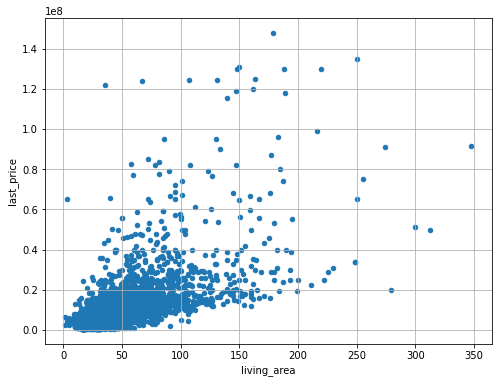

In [79]:
#зависимость двух параметров цена -  площадь жилая
data_near_20km.plot(x='living_area', y='last_price', kind='scatter', figsize=(8, 6), grid=True);

ВЫВОД: Зависимость цена квартиры и жилой площади квартиры существует, чем больше жилая площадь, тем больше стоимость квартиры.

In [80]:
data_near_20km['last_price'].corr(data_near_20km['kitchen_area'])

0.46214048448745965

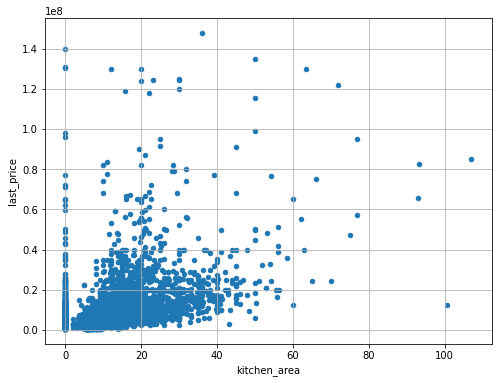

In [81]:
#зависимость двух параметров цена -  площадь кухни
data_near_20km.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(8, 6), grid=True);

ВЫВОД: Зависимость цены от площади кухни есть, но менее выраженная по сравнению с общей?жилой площадью, также стоит отметить вертикальный столбик на графике, вероятно он возник по причине 0 кухонь в апартаментах, студиях, квартир с открытой планировкой.

In [82]:
data_near_20km['last_price'].corr(data_near_20km['rooms'])

0.4414803228445433

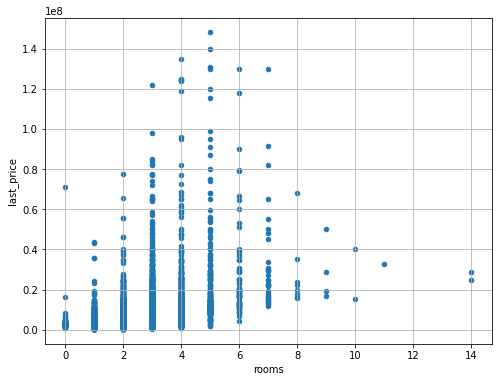

In [83]:
#зависимость двух параметров цена -  комнаты количество
data_near_20km.plot(x='rooms', y='last_price', kind='scatter', figsize=(8, 6), grid=True);

ВЫВОД: Зависимость количество комнат и стоимость квартиры существует, но не так ярко выражена как общая площадь и жилая площадь.

# ПРОДОЛЖИМ СОВМЕСТНОЕ РАССМОТРЕНИЕ ДВУХ ГРУПП

In [84]:
#цена квартир в 10 населенных пунктах с наибольшим кол-вом объявлений
data_grouped_locality = data.groupby('locality_name')['price_per_m'].agg(['count','mean'])

df_sort=data_grouped_locality.sort_values('count',ascending=False).head(10)                            

***ВЫВОД:*** Наибольшее количество объявлений (не считая Санкт-Петербург) в Мурино, Кудрово, Шушары, Всеволожск, Пушкин, Колпино,Парголово, Гатчина,Выборг и Петергоф, не странно  - это самые населенные районы СПб и ЛО и более популярные.

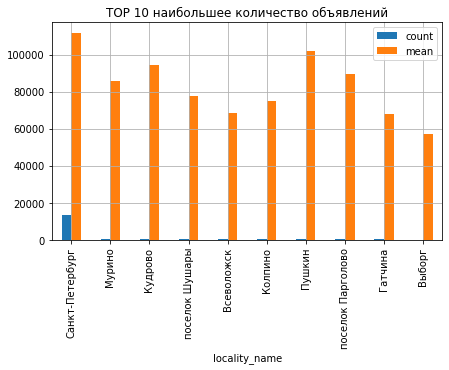

In [85]:
df_sort.plot(kind='bar', figsize=(7,4), grid = True, title='TOP 10 наибольшее количество объявлений');

In [86]:
data_grouped_locality.sort_values('mean',ascending=False).head(11)

,count,mean
locality_name,,
Санкт-Петербург,13552,111703.209395
Зеленогорск,21,111332.344762
Пушкин,307,102074.629283
Сестрорецк,163,101232.408957
поселок Лисий Нос,3,100660.816667
поселок Левашово,1,96997.690000
деревня Мистолово,9,96157.153333
Кудрово,439,94335.254715
поселок Парголово,302,89505.043543


***ВЫВОД:*** Наибольшая стоимость м2 в куротных городах и в Санкт-Петербурге

In [87]:
data_grouped_locality.sort_values('mean',ascending=False).tail(10)

,count,mean
locality_name,,
поселок станции Лужайка,1,15000.000
поселок Житково,2,14956.275
деревня Ям-Тесово,2,13711.555
поселок Тёсово-4,1,12931.030
деревня Малая Романовка,1,12724.550
поселок Совхозный,2,12629.130
деревня Выскатка,2,12335.480
деревня Вахнова Кара,1,11688.310
поселок станции Свирь,2,11481.480


***ВЫВОД:*** Наименьшая стоимость м2 отдаленных поселках и деревнях

In [88]:
#средняя стоимость км от центра города
data['price_per_km']=(data['last_price']/data['dist_to_cent_km']).round(2)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,week,month,year,floor_type,dist_to_cent_km,price_per_km
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0,176315.79
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0,371142.86
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0,9271428.57
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0,1250000.00
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок городского типа Янино-1,NaN,13168.0,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,13.0,222307.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.6,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129903.98,3,10,2016,другой,4.0,2367500.00
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,False,False,6.0,0,Тихвин,NaN,13168.0,NaN,NaN,NaN,NaN,413.0,45000.00,4,7,2017,другой,13.0,103846.15
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.0,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73717.95,4,8,2016,другой,34.0,135294.12
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.5,0,Тосно,NaN,13168.0,NaN,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,13.0,238461.54


In [89]:
df_spb = data.query('locality_name == "Санкт-Петербург"')
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,week,month,year,floor_type,dist_to_cent_km,price_per_km
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0,371142.86
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,0.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0,9271428.57
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0,1250000.00
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0,360000.00
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0,360714.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.0,12,False,False,False,15.0,0,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0,91089.11,0,4,2019,другой,14.0,657142.86
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.1,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100566.57,2,2,2018,другой,16.0,221875.00
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,False,False,6.0,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105769.23,3,7,2018,другой,6.0,916666.67
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.6,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129903.98,3,10,2016,другой,4.0,2367500.00


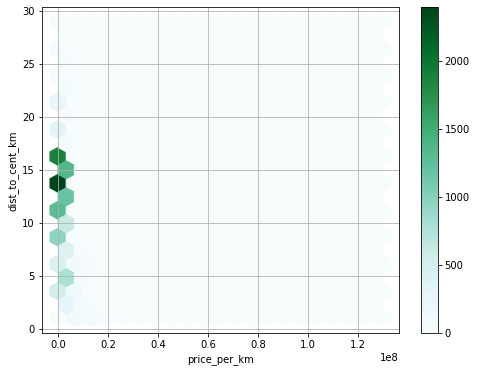

In [90]:
df_spb.plot(x='price_per_km', y='dist_to_cent_km', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

***ВЫВОД:*** Прослеживается интересная зависимость, что квартиры на растоянии 11-16 км от центра имеют большую стоимость в отличие от квартир ближе к центру.

In [91]:
data.pivot_table(index='dist_to_cent_km',values= 'price_per_m',aggfunc = ('mean','median'))

,mean,median
dist_to_cent_km,,
0.0,205506.388889,142138.435
1.0,146850.933333,125135.745
2.0,150450.807608,119178.080
3.0,116870.770691,105263.160
4.0,128723.926871,115497.115
5.0,136657.392000,125980.130
6.0,145245.297355,126658.940
7.0,151154.772126,123509.420
8.0,123113.926472,120937.500


***ВЫВОД:*** Чем ближе к центру города, тем стоимость за м2 выше.

### Общий вывод

Целью проводимого исследования являлся поиск закономерностей и аномалий, интересных особенностей на рынке недвижимости Санкт-Петербурга и Ленинградской области.
 
Входными данными являлется архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

При анализе данных столкнулись с рядом проблем, таких как, отсутствие значений в большинстве столбцов, проблема была решена при помощи заполнения данных медианными значениями по столбцам высота потолков, расстояние до центра города. Также в виду наличия большого количеситва пропусков по типу жилья: апартаменты/не апартаменты был сделан вывод, что данные в объявлении по типу не апартаменты не были проставлены по причине того, что квартира действительно не являлась апартаментов, пропуски в столбце были заменены на значение не апартаменты (False).

Все пропуски в столбце количество балконов были заменены на 0, вероятно в этих квартирах отсутствуют балконы.

Также в ходе исследования были удалены выбросы , аномальные и редкие значения, такие как высота потолков свыше 7м, мобщих метраж помещений свыше 500 м2, дни публикации объявления менее 2 дней, пощения с жилой площадью менее 2 м2, аномальные стоимость жилья до 13 000 р и свыше 150 000 000 р.

В столбце 'locality_name'были обнаружены невяные дубликаты и приведены к единому названию порядка 49 объявлений.

Жилые помещения были категоризированы по этажу расположения квартиры на первый/последний и другие, большинство объявлений расположены не на первом и последнем этажах.

Более ликвидными считаются помещения с малой этажностью здания, стоимость таких квартир гораздо выше, чем стоимость квартир расположенных в высотных зданиях.

Основное количество объявлений сосредоточено на 5 и 9 этажах, что говорит о преобладаний зданий именно этой высотности.

Для более детальной проработки зависимости стоимости квартиры от других факторов данные были сгруппированы на две групы, первая: квартиры расположенные в 20 км от центра города и квариры расположенные дальше 20 км от центра города.

После проведенного исследования можно сделать следующие выводы, группа квартир расположенных до 20 км от города имеют зависимость стоимости квартиры от этажности здания, расположения от центра города, стоимости квартиры от количества комнат, общей,жилой площади - существует.

Квартиры, расположенные дальше чем 20 км от города имеют также зависимость стоимости квартиры от площади (общей/жилой/количества комнат), что вполне логично.

Также стоит отметить, что наибольшее количество объявлений размещено в Санкт-Петербурге и его ближайших окрестностях. Наибольшая средняя стоимость квартир в городе Санкт-Петербурге и курортных городах, типа Зеленогорск, Сестрорецк, Пушкин, а также в густонаселенных районах Санкт-Петербурга типа Мурино, Кудрово. Наименьшая стоимость в деревнях и селах отдаленных от Санкт-Петербурга.

Больше всего объявлений было создано в будние дни и в месяцы - осенне-зимнего периода, исключение декабрь и январь (Новогодние праздники).

В среднем квартиры в группе до 20 км от центра города продаются за 2 месяца, также стоит отметить, что стоимсть таких ниже, существует зависимость чем ниже стоимсоть квартиры, тем быстрее она продается. Среднее время продажи 180 дней отличается от медианного 95 дней по причине того, что есть квартиры продающиеся очень долго, есть быстрые продажи (большой разброс).